In [1]:
from mnistNet import *
from l2_attack import *
model=mnistModel()
model.getModel(epochs=6)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.288627
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.424250
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.575215
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.578611
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.434048
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.218116
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.282851
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.410970
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.309579
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.373360

Test set: Average loss: 0.1156, Accuracy: 9639/10000 (96%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.177719
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.530829
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.382403
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.240912
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.252338
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.104140
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.325098
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.438693
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.216836
T

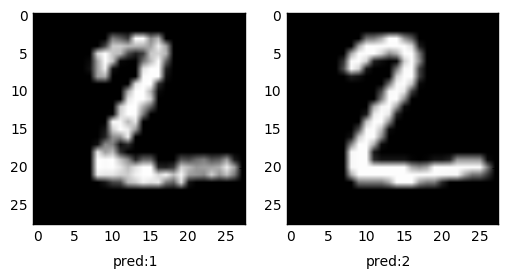

In [13]:
att=l2_attack(model=model,iters=1000,c=100,verbose=False)
test=datasets.MNIST('../data', train=False, transform=transforms.Compose([
                transforms.ToTensor()
            ]))
originimg=test[1][0]
newimg=att.attack(x=originimg,target=[0,1,0,0,0,0,0,0,0,0],kappa=0)
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
newpred=model.pred(newimg[None,:]).numpy()
originpred=model.pred(Variable(originimg[None,:])).numpy()
fig,axs = plt.subplots(1,2)
axs[0].imshow(newimg.data.numpy().reshape(28,28),cmap = plt.cm.gray)
axs[0].text(10,33,'pred:{}'.format(newpred[0][0]))
axs[1].imshow(originimg.numpy().reshape(28,28),cmap = plt.cm.gray)
axs[1].text(10,33,'pred:{}'.format(originpred[0][0]))